# Clases

Una clase es una especie de "plantilla" que nos ayudará a crear objetos con ciertas características, así como también nos permitirá definir funciones para modificarlas. La estructura de una clase se puede ver a través del siguiente ejemplo: Suponga que tiene un restaurante y quiere registrar a todos sus clientes con algunos de sus datos personales y el estado de la cuenta: Pago o no pago. Esto se haría de la siguiente forma:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

class cliente: # Creamos una clase, que representará a un solo cliente

    def __init__(self, nombre, telefono, sexo): # Se crea la función __init__(self, argumentos). Esta función se ejecuta inmediatamente al ejecutar la clase (al crear un cliente) por defecto. Todo lo que esté por dentro de esta función se ejecuta automáticamente cuando ejecutamos la clase. Los argumentos de entrada serán el "nombre" del cliente, su "telefono" y su "sexo".
        self.nombre_cliente = nombre # Definimos una variable propia del "cliente" que estamos creando, la cual será "nombre_cliente" y tendrá como valor el nombre que introducimos al ejecutar la clase. El "self" indica que esa variable es única para el cliente que estamos creando.
        self.telefono_cliente = telefono 
        self.sexo_cliente = sexo
    
    def definir_estado_de_cuenta(self, estado): # Creamos una función que definirá el estado de cuenta del cliente.
        self.estado_de_cuenta = estado # Creamos una nueva variable propia del cliente, que será su estado de cuenta.

Una vez definida la clase podemos crear distintos objetos que tengan las características que definimos:

In [2]:
cliente_1 = cliente("Manuel", 123456789, "Masculino") # Creamos un cliente de nombre Manuel, teléfono 123456789 y de sexo masculino
cliente_2 = cliente("Paula", 987654321, "Femenino")

Creados los clientes podemos ver sus especificaciones de la siguiente forma:

In [3]:
print(cliente_1.nombre_cliente, cliente_1.telefono_cliente, cliente_1.sexo_cliente)

Manuel 123456789 Masculino


Sin embargo no podemos ver su estado de cuenta porque aún no está definido:

In [4]:
print(cliente_1.estado_de_cuenta)

AttributeError: 'cliente' object has no attribute 'estado_de_cuenta'

Para crear este estado de cuenta debemos asignarlo a través de la función "definir_estado_de_cuenta":

In [7]:
cliente_1.definir_estado_de_cuenta("No pago")
cliente_2.definir_estado_de_cuenta("Pago")

print(cliente_1.estado_de_cuenta)
print(cliente_2.estado_de_cuenta)

No pago
Pago


## Segundo ejemplo

Las clases también pueden recibir todo tipo de argumentos, incluso funciones! Un ejemplo se muestra a continuación. Supongamos que queremos una clase que cree una gráfica de cualquier función que reciba como argumento. Esta función dependerá de un solo parámetro, el cual variará desde 0 hasta 10.  Eso se haría de la siguiente forma:

In [19]:
def f(x): # Creamos una función que retorne el seno de x.
    return np.sin(x)

def g(x):
    return np.cos(x)

class grafica:

    def __init__(self):
        self.x = np.linspace(0,10,100) # Creamos un vector que representará los valores de x (el argumento de la funcion)
         # Creamos la figura donde se expondrá la gráfica.
    
    def graficar(self, funcion, label_x, label_y, titulo): # Definimos una función que grafica la función y la muestra.
        self.figura = plt.figure(figsize=(15,10))
        plt.plot(self.x, funcion(self.x)) # Graficamos la función.
        plt.xlabel(label_x) # Definimos el titulo del eje x.
        plt.ylabel(label_y) # Definimos el titulo del eje y.
        plt.title(titulo) # Definimos el titulo de la grafica.
        plt.show()


grafica1 = grafica() # Creamos una grafica. 

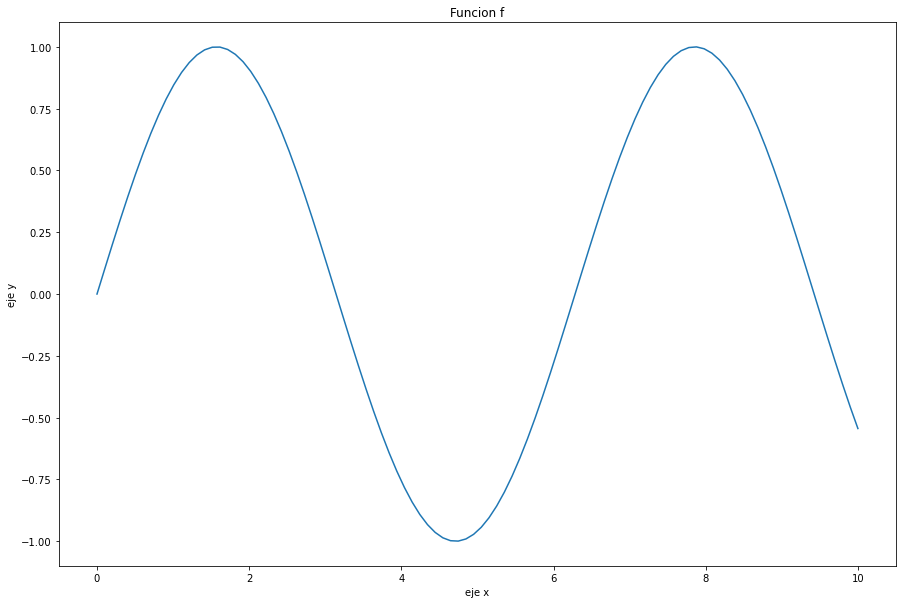

In [20]:
grafica1.graficar(f, "eje x", "eje y", "Funcion f") # Graficamos...

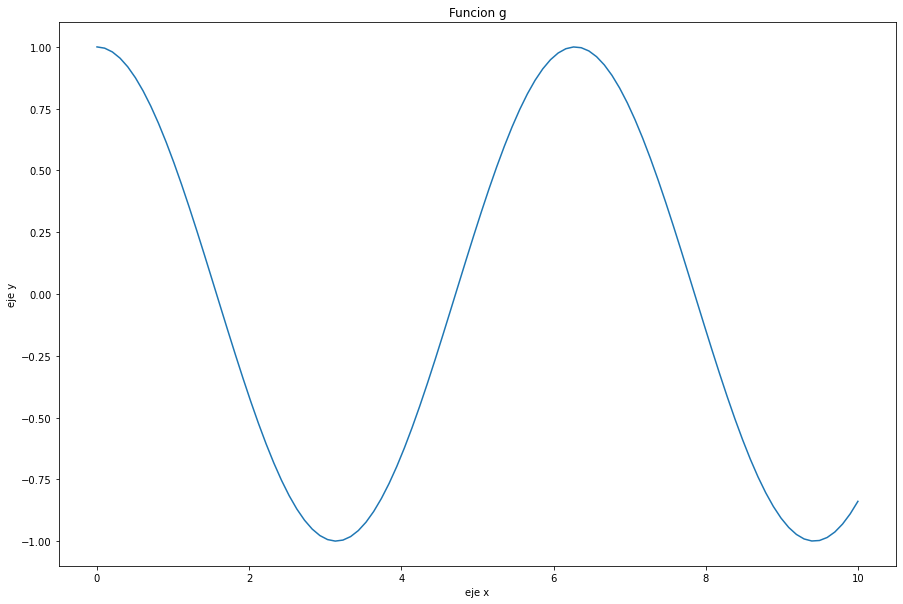

In [21]:
grafica1.graficar(g, "eje x", "eje y", "Funcion g") # Graficamos...

Claramente esto mismo se puede lograr sin tanta complicación graficando directamente las cosas, pero es solo un ejemplo. 

También se puede modificar el código anterior para que, por ejemplo, no solo grafique una sino varias gráficas al tiempo. Supongamos que queremos graficar tanto la función f como g en una sola gráfica y no gráficas separadas como se hizo antes. Esto se hace de la siguiente forma:



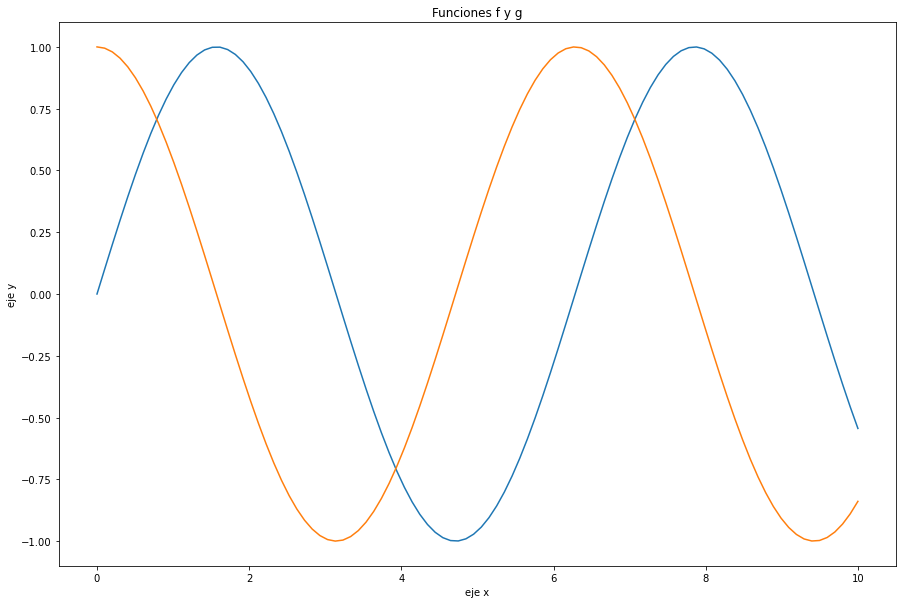

In [22]:
class grafica:

    def __init__(self):
        self.x = np.linspace(0,10,100) # Creamos un vector que representará los valores de x (el argumento de la funcion).
    
    def graficar(self, funciones, label_x, label_y, titulo): # Definimos una función que grafica la función y la muestra. Asumimos que el parámetro "funciones" ya no será una sola función sino que puede ser una lista o un array que contenga las funciones que deseamos graficar al tiempo.
        self.figura = plt.figure(figsize=(15,10)) # Creamos la figura donde se expondrá la gráfica.
        for funcion in funciones: # hacemos un for que recorrera toda la lista o array de funciones una por una y la graficará.
            plt.plot(self.x, funcion(self.x)) # Graficamos cada función.
        
        plt.xlabel(label_x) # Definimos el titulo del eje x.
        plt.ylabel(label_y) # Definimos el titulo del eje y.
        plt.title(titulo) # Definimos el titulo de la grafica.
        plt.show()


grafica1 = grafica() # Creamos una grafica.
funciones = [f,g] # Funciones que quiero graficar.

grafica1.graficar(funciones, "eje x", "eje y", "Funciones f y g") # Graficamos...

## Tercer ejemplo

Un ejemplo de aplicación en física es el de obtener la trayectoria de un objeto que siga ciertas ecuaciones de movimiento. Supongamos que queremos obtener la posición de un proyectil en cualquier tiempo, sabiendo que este proyectil sigue un movimiento uniformemente acelerado. Dado que la única fuerza que siente el proyectil es la gravedad, entonces la segunda ley de Newton nos dice que $$m\ddot{y} = -mg,$$ (tomando el eje y positivo, o sea el eje y va hacia arriba) o lo que es lo mismo: $$\ddot{y} = -g.$$ Esta ecuación diferencial podemos escribirla como $$\dot{v}_y = -g,$$ donde $$v_y = \dot{y}.$$ De forma que una ecuación diferencial de segundo orden la partimos en dos más fáciles de primer orden. Escribiendo de forma explícita las derivadas nos queda que: $$\frac{v_y(t + dt) - v_y(t)}{dt} = -g$$ y $$v_y(t) = \frac{y(t + dt) - y(t)}{dt}$$ donde $dt$ es un número que tiende a cero. Discretizando las anteriores ecuaciones (necesario para programación) estas quedarían como: $$ v_y[i+1] = v_y[i] - g*dt \quad ó \quad v_y(ahora) = v_y(antes) - g*dt$$ y $$y[i+1] = y[i] + v_y[i]*dt \quad ó \quad y(ahora) = y(antes) + v_y(antes)*dt$$

Teniendo estas ecuaciones de movimiento ahora si podemos proceder a crear una clase que identifique a un proyectil con ciertas condiciones iniciales y que evolucionaremos en el tiempo:

In [7]:
class proyectil:
    g = 9.8 # aceleracion gravitacional
    dt = 0.001 # Definimos dt
    def __init__(self, y0, vy0): # Se reciben como parámetros iniciales la posición inicial, velocidad inicial del proyectil y el numero de datos de posicion y velocidad que quiero tener
        self.y = [y0] # Creamos la posicion y como una lista cuya primera componente es la posicion inicial
        self.vy = [vy0] # Lo mismo de antes pero para la velocidad
        self.t = [0] # Creamos una lista que guardará los tiempos

    def evolucionar(self, iteraciones): # Creamos la funcion que usará las ecuaciones de movimiento para evolucionar el sistema en un numero determinado de iteraciones

        for i in range(iteraciones):
            vy_nuevo = self.vy[i] - proyectil.g * proyectil.dt # La forma de usar g y dt, que son variables que no son "self" es de esta forma.
            y_nuevo = self.y[i] + self.vy[i]*proyectil.dt
            t_nuevo = self.t[i] + proyectil.dt
            self.vy.append(vy_nuevo)
            self.y.append(y_nuevo)
            self.t.append(t_nuevo)

Ahora con la clase definida podemos crear distintos proyectiles con distintas condiciones iniciales para ver cómo se comportan en el tiempo:

In [8]:
proyectil1 = proyectil(1,1) # Creamos tres proyectiles con tres condiciones iniciales distintas
proyectil2 = proyectil(2,1)
proyectil3 = proyectil(3,1)

print(proyectil1.y, proyectil1.vy, proyectil1.t) # Imprimimos las posiciones y velocidades antes de evolucionar en el tiempo el proyectil

[1] [1] [0]


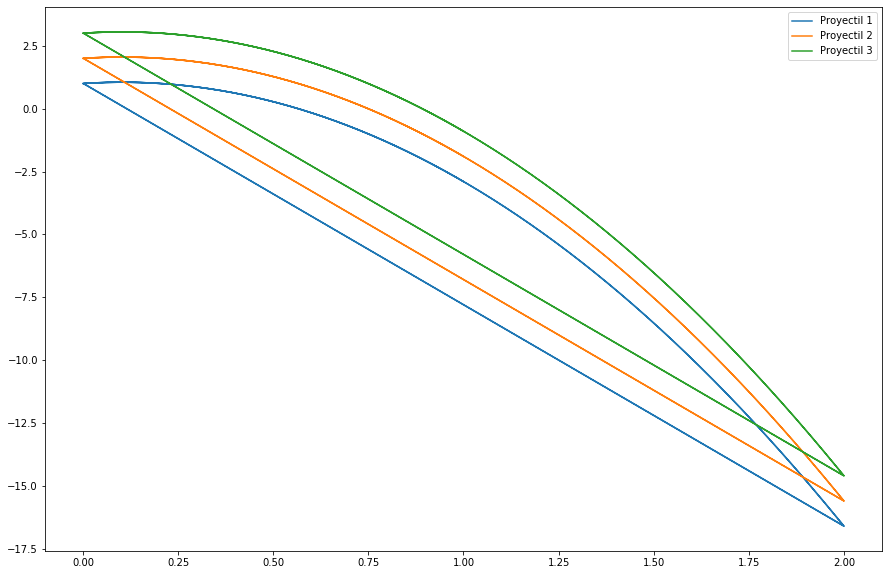

<Figure size 432x288 with 0 Axes>

In [11]:
proyectil1.evolucionar(1000) # Evolucionamos el sistema en 1000 iteraciones
proyectil2.evolucionar(1000) # Evolucionamos el sistema en 1000 iteraciones
proyectil3.evolucionar(1000) # Evolucionamos el sistema en 1000 iteraciones

t_proyectil1, y_proyectil1, vy_proyectil1 = np.array(proyectil1.t), np.array(proyectil1.y), np.array(proyectil1.vy) # Obtenemos tiempos, posiciones y velocidades y los convertimos en arrays
t_proyectil2, y_proyectil2, vy_proyectil2 = np.array(proyectil2.t), np.array(proyectil2.y), np.array(proyectil2.vy)
t_proyectil3, y_proyectil3, vy_proyectil3 = np.array(proyectil3.t), np.array(proyectil3.y), np.array(proyectil3.vy)


figura = plt.figure(figsize=(15,10)) # Graficamos de forma MUY simple las posiciones...
plt.plot(t_proyectil1, y_proyectil1, label="Proyectil 1")
plt.plot(t_proyectil2, y_proyectil2, label="Proyectil 2")
plt.plot(t_proyectil3, y_proyectil3, label="Proyectil 3")
plt.legend()
plt.show()
plt.clf()